<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP7/TP7_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

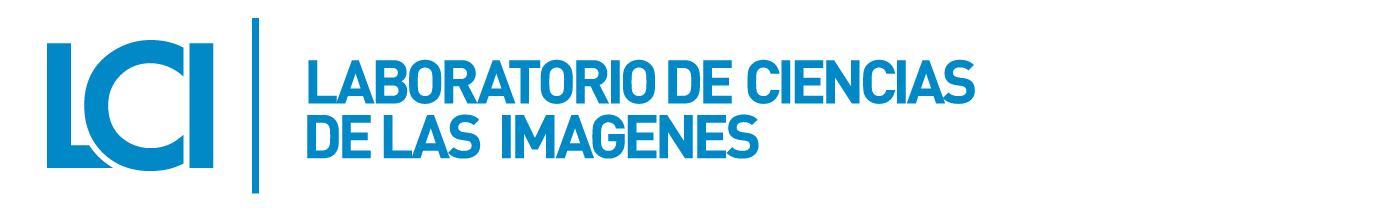


#Práctica 7: Autómatas celulares

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita renderizar autómatas celulares de una dimensión aplicando reglas de evolución
## Objetivos Específicos
*   Implementar el sistema dinámico del juego de la vida
*   Evaluar el sistema mediante reglas de nacimiento, muerte y supervivencia
*   Visualizar los resultados



###Problema
Implementar sistemas dinámicos discretos que mediante reglas de evolución como nacimiento, muerte y supervivencia permita renderizar el autómata celular (AC) del juego de la vida creado por John Horton Conway.

In [1]:
#Lectura de librerías
!pip install replit
import random, time
import sys, os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Reglas de vida o muerte
A continuación se describe 



*   Nacimiento: la célula nace si tiene exactamente 3 vecinos a su alrededor
*   Muerte: la célula nace si tiene exactamente 3 vecinos a su alrededor
*   Supervivencia: si la vecindad sigue siendo 2 o 3 se mantiene vivo.

###Determinación de vecindad
El vecino será contado bajo las siguientes formas, las mismas, son elegidas por el usuario:

*   rule_1 = | |
*   rule_2 = | |x
*   rule_3 = |x|
*   rule_4 = |x|x
*   rule_5 = x| |
*   rule_6 = x| |x
*   rule_7 = x|x|
*   rule_8 = x|x|x



In [2]:

#@title Seleccione los parámetros { run: "auto" }
maxColumns  = 19 #@param {type:"slider", min:0, max:30, step:1}
maxRows = 20 #@param {type:"slider", min:0, max:30, step:1}
rule_1= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_2= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_3= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_4= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_5= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_6= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_7= 1 #@param {type:"slider", min:0, max:1, step:1}
rule_8= 1 #@param {type:"slider", min:0, max:1, step:1}

import random, time
import sys, os

maxColumns = maxColumns
maxRows = maxRows

def Map():
    map = []
    for y in range(maxColumns):
        row = []
        for x in range(maxRows):
            row.append(random.randint(0, 1))
        map.append(row)
    return map

board = Map()

def Draw(data):
    character = u'\u25A0' + ' '
    charact = u'\u25A1' + ' '

    for y in range(maxColumns):
        row = ''
        for x in range(maxRows):

            if data[y][x] == 1:
                row += character
            else:
                row += charact

        row += '\r'
        print(row)

def rules(data):
    map = []
    for y in range(maxColumns):
        row = []
        for x in range(maxRows):
            neighbor = 0
            vertical_Range = (y >= 0 and y < maxColumns - 1)
            horizontal_Range = (x >= 0 and x < maxRows - 1)

            up = y - 1
            ct = y
            if vertical_Range:
                dn = y + 1
            else:
                dn = 0

            iz = x - 1
            md = x
            if horizontal_Range:
                dr = x + 1
            else:
                dr = 0

            if data[up][iz] == rule_5:
                neighbor += 1
            if data[up][dr] == rule_2:
                neighbor += 1
            if data[dn][iz] == rule_7:
                neighbor += 1
            if data[dn][dr] == rule_4:
                neighbor += 1
            if data[up][md] == rule_1:
                neighbor += 1
            if data[dn][md] == rule_3:
                neighbor += 1
            if data[ct][iz] == rule_6:
                neighbor += 1
            if data[ct][dr] == rule_8:
                neighbor += 1

            row.append(neighbor)
        map.append(row)
    return map

def DrawNeighbors(data):
    for y in range(maxColumns):
        row = ''
        for x in range(maxRows):
            row += str(data[y][x]) + ' '
        row += '\r'
        print(row)

def NewMap(data, nData):
    for y in range(maxColumns):
        for x in range(maxRows):

            if data[y][x] == 0:
                if nData[y][x] == 3:
                    data[y][x] = 1
            elif data[y][x] == 1:
                if nData[y][x] < 2 or nData[y][x] > 3:
                    data[y][x] = 0
    return data

board = Map()
print("----------------------------------------")
print("A continuación se imprimen 5 iteraciones")
print("----------------------------------------")
for i in range(5):
    os.system('cls')
    print("----------")
    print("Iteración" + str(i))
    print("----------")
    Draw(board)
    neighbors = rules(board)
    #DrawNeighbors(neighbors)
    board = NewMap(board, neighbors)
    time.sleep(10)

----------------------------------------
A continuación se imprimen 5 iteraciones
----------------------------------------
----------
Iteración0
----------
□ ■ ■ □ □ □ □ □ ■ ■ ■ □ ■ □ □ ■ □ □ ■ □ 
□ □ ■ □ □ ■ □ ■ □ ■ □ □ □ □ ■ □ ■ □ □ ■ 
□ ■ ■ ■ ■ ■ □ □ □ □ □ ■ ■ □ ■ ■ □ □ ■ ■ 
□ □ □ □ ■ □ ■ □ ■ ■ □ ■ ■ ■ ■ □ □ □ □ ■ 
□ ■ ■ ■ □ □ □ □ ■ ■ □ ■ ■ □ ■ □ □ □ □ □ 
□ □ □ □ □ ■ ■ ■ ■ ■ ■ ■ □ ■ □ ■ □ □ ■ □ 
■ □ ■ ■ □ ■ ■ □ ■ □ ■ ■ □ □ ■ ■ □ □ ■ □ 
□ ■ □ ■ ■ □ □ □ ■ ■ □ □ ■ □ □ □ □ □ □ □ 
□ □ ■ ■ □ ■ ■ ■ □ □ ■ ■ ■ ■ ■ □ ■ ■ ■ ■ 
□ ■ □ □ □ □ □ □ ■ ■ ■ □ ■ □ □ □ ■ □ ■ □ 
■ ■ □ □ □ ■ □ □ □ □ □ ■ □ ■ ■ □ ■ □ □ ■ 
■ ■ ■ ■ ■ ■ □ □ ■ □ □ □ □ ■ ■ ■ ■ □ ■ ■ 
■ ■ ■ □ ■ ■ □ □ □ ■ □ ■ ■ ■ ■ ■ □ ■ ■ ■ 
■ ■ ■ ■ ■ □ □ ■ ■ □ □ □ ■ ■ ■ ■ □ ■ □ □ 
□ □ □ ■ ■ □ □ ■ ■ □ ■ ■ □ □ ■ □ □ □ □ ■ 
■ ■ ■ □ □ □ □ □ □ ■ ■ ■ □ ■ □ □ ■ □ ■ □ 
□ □ ■ ■ ■ □ ■ ■ □ □ □ □ □ □ ■ □ □ ■ □ □ 
□ ■ □ ■ ■ □ □ □ ■ ■ □ □ □ □ □ ■ □ □ ■ □ 
□ □ ■ □ □ □ ■ □ ■ ■ ■ ■ □ ■ ■ ■ □ □ □ ■ 
----------
Iteración1
----------
■ ■ ■ ■ □ □ ■ □ □ □ □ □ ■ □ □ □ 

###Análisis de resultados

*   El aplicativo desarrollado satisface con los objetivos del trabajo práctico, el mismo permite el renderizado del AC Juego de la vida creado por John Horton aplicando las reglas de evolución nacimiento, muerte y supervivencia. Para el caso práctico se imprime la trama cuadriculada para 5 iteraciones.

*   El usuario puede interactuar con el aplicativo mediante scrollbars, donde se permite seleccionar la cantidad de filas y columnas para la cuadricula de renderizado, y, las reglas que determina si el vecino debe ser contado.